# **DL**

In [ ]:
!pip install  tf2onnx onnxruntime netron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import os
import tensorflow as tf
import pandas as pd
import keras
from keras import layers
import numpy as np
import tf2onnx
import onnxruntime as rt
import netron
import random
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
dataframe1 = pd.read_excel('/content/vallen_training_dataset.xlsx')

In [ ]:
dataframe1.columns

Index(['amplitude', 'duration', 'energy', 'rms', 'rise_time', 'counts',
       'label'],
      dtype='object')

In [ ]:
dataframe1

,amplitude,duration,energy,rms,rise_time,counts,label
0,0.000125,0.000280,76.227486,0.000005,0.000063,4,0
1,0.000183,0.000332,110.221461,0.000006,0.000006,7,0
2,0.000356,0.001995,1471.628226,0.000008,0.000132,140,0
3,0.000209,0.000446,229.885780,0.000006,0.000417,20,0
4,0.000135,0.000270,78.560903,0.000008,0.000007,3,0
...,...,...,...,...,...,...,...
27852,0.000501,0.003276,2495.863662,0.000008,0.000236,208,3
27853,0.000307,0.001500,673.783913,0.000007,0.000211,78,3
27854,0.000282,0.001784,1152.330144,0.000009,0.000295,113,3
27855,0.000178,0.000674,337.636269,0.000008,0.000186,42,3


In [ ]:
dataframe2=dataframe1.drop(['label'], axis='columns')


In [ ]:
values = dataframe2.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
dataframe = pd.DataFrame({'amplitude': scaled[:, 0], 'duration': scaled[:, 1],'energy': scaled[:, 2],'rms': scaled[:, 3],'rise_time': scaled[:, 4],'counts': scaled[:, 5]})

In [ ]:
dataframe ['label']=dataframe1['label']

In [ ]:
dataframe

,amplitude,duration,energy,rms,rise_time,counts,label
0,0.000754,0.000769,0.000005,0.025294,0.001631,0.000250,0
1,0.002665,0.001265,0.000010,0.065882,0.000142,0.000437,0
2,0.008396,0.017155,0.000197,0.182353,0.003407,0.008736,0
3,0.003519,0.002350,0.000026,0.071765,0.010768,0.001248,0
4,0.001106,0.000671,0.000005,0.182353,0.000178,0.000187,0
...,...,...,...,...,...,...,...
27852,0.013172,0.029389,0.000339,0.160588,0.006095,0.012979,3
27853,0.006787,0.012422,0.000087,0.115294,0.005459,0.004867,3
27854,0.005932,0.015131,0.000153,0.236471,0.007617,0.007051,3
27855,0.002514,0.004533,0.000041,0.182353,0.004813,0.002621,3


In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    # f"Using {len(train_dataframe)} samples for training "
    f"and {len(val_dataframe)} for validation"
)

and 5571 for validation


In [ ]:

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("label")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [ ]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

don"t run

In [ ]:

def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


In [ ]:

# Numerical features
counts = keras.Input(shape=(1,), name="counts")
amplitude = keras.Input(shape=(1,), name="amplitude")
duration = keras.Input(shape=(1,), name="duration")
energy = keras.Input(shape=(1,), name="energy")
rms = keras.Input(shape=(1,), name="rms")
rise_time = keras.Input(shape=(1,), name="rise_time")
'''
all_inputs = [
    amplitude,
    rms,
    counts,

    duration,
    energy,
    rise_time

]

# Numerical features
counts_encoded = encode_numerical_feature(counts, "counts", train_ds)
amplitude_encoded = encode_numerical_feature(amplitude, "amplitude", train_ds)
duration_encoded = encode_numerical_feature(duration, "duration", train_ds)
energy_encoded = encode_numerical_feature(energy, "energy", train_ds)
rms_encoded = encode_numerical_feature(rms, "rms", train_ds)
rise_time = encode_numerical_feature(rise_time, "rise_time", train_ds)

all_features = layers.concatenate(
    [
        amplitude_encoded,
        duration_encoded,
        energy_encoded,
        rms_encoded,
        rise_time,
        counts_encoded

    ]
)

'''
all_inputs1= layers.concatenate ( [
      amplitude,
     duration,
     energy,
     rms,
     rise_time,
     counts



])
x = layers.Dense(512, activation="relu")(all_inputs1)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.1)(x)

output = layers.Dense(4, activation="softmax",name="results")(x)
model = keras.Model(inputs=[counts, amplitude, duration, energy, rms, rise_time], outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history =model.fit(train_ds, epochs=200, validation_data=val_ds)

Epoch 1/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3770 - loss: 1.2880 - val_accuracy: 0.4062 - val_loss: 1.2238
Epoch 2/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3976 - loss: 1.2388 - val_accuracy: 0.3908 - val_loss: 1.2297
Epoch 3/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4118 - loss: 1.2173 - val_accuracy: 0.4048 - val_loss: 1.2245
Epoch 4/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4070 - loss: 1.2189 - val_accuracy: 0.3931 - val_loss: 1.1963
Epoch 5/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4118 - loss: 1.2041 - val_accuracy: 0.4107 - val_loss: 1.1961
Epoch 6/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4079 - loss: 1.2071 - val_accuracy: 0.4116 - val_loss: 1.2039
Epoch 7/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4078 - loss: 1.2024 - val_accuracy: 0.4159 - val_loss: 1.1936
Epoch 8/200
697/697 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4201 - loss: 1.1970 - val_accu

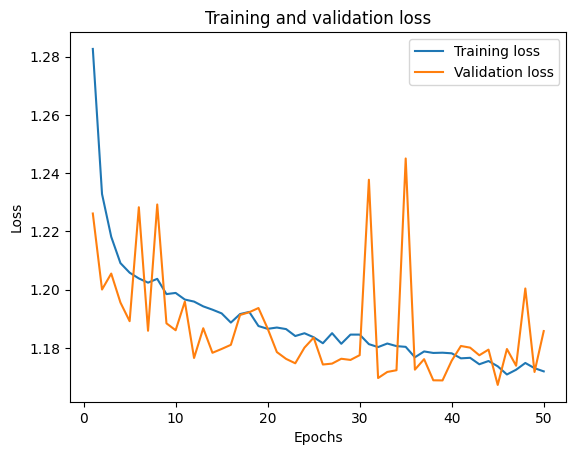

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

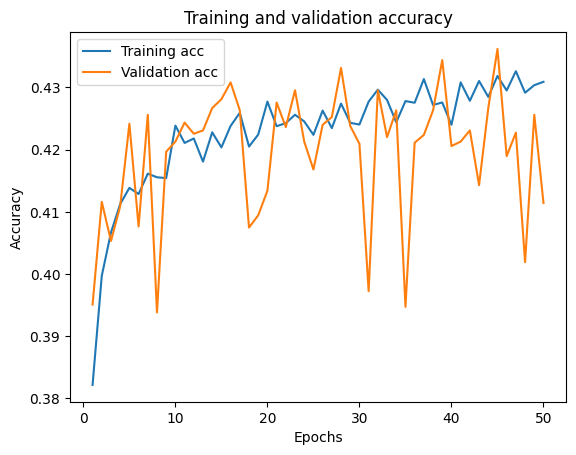

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:

model.save("multiclass.h5")


In [ ]:
loaded_model = load_model("/content/multiclass.h5")

In [ ]:
spec = (tf.TensorSpec(( 1), tf.float32, name="amplitude"),tf.TensorSpec(( 1), tf.float32, name="duration"),tf.TensorSpec(( 1), tf.float32, name="energy"),tf.TensorSpec(( 1), tf.float32, name="rms"),tf.TensorSpec(( 1), tf.float32, name="rise_time"),tf.TensorSpec((1), tf.float32, name="counts"),)

In [ ]:
output_path = 'multiclass.onnx'
model_proto, _ = tf2onnx.convert.from_keras(loaded_model, input_signature=spec, opset=13, output_path=output_path)
output_names = [n.name for n in model_proto.graph.output]

In [ ]:
input_data = {
    "amplitude": np.array([0.05], dtype=np.float32),
    "duration": np.array([0.001], dtype=np.float32),
    "energy": np.array([0.6], dtype=np.float32),
    "rms": np.array([0.9], dtype=np.float32),
    "rise_time": np.array([0.3], dtype=np.float32),
    "counts": np.array([0.7], dtype=np.float32)

}


In [ ]:
input_dict = {name: tf.convert_to_tensor([value]) for name, value in input_data.items()}
predictions = loaded_model.predict(input_dict)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[5.3260158e-07, 6.5845722e-01, 1.4429952e-22, 3.4154218e-01]],
      dtype=float32)

In [ ]:
class_keras=np.argmax(predictions)
class_keras

1

In [ ]:

m = rt.InferenceSession(output_path)
onnx_pred = m.run(output_names, input_data)
onnx_pred

[array([[3.7804045e-02, 3.3292083e-05, 9.6213579e-01, 2.6872038e-05]],
       dtype=float32)]

In [ ]:
class_onnx=np.argmax(onnx_pred)
class_onnx

2

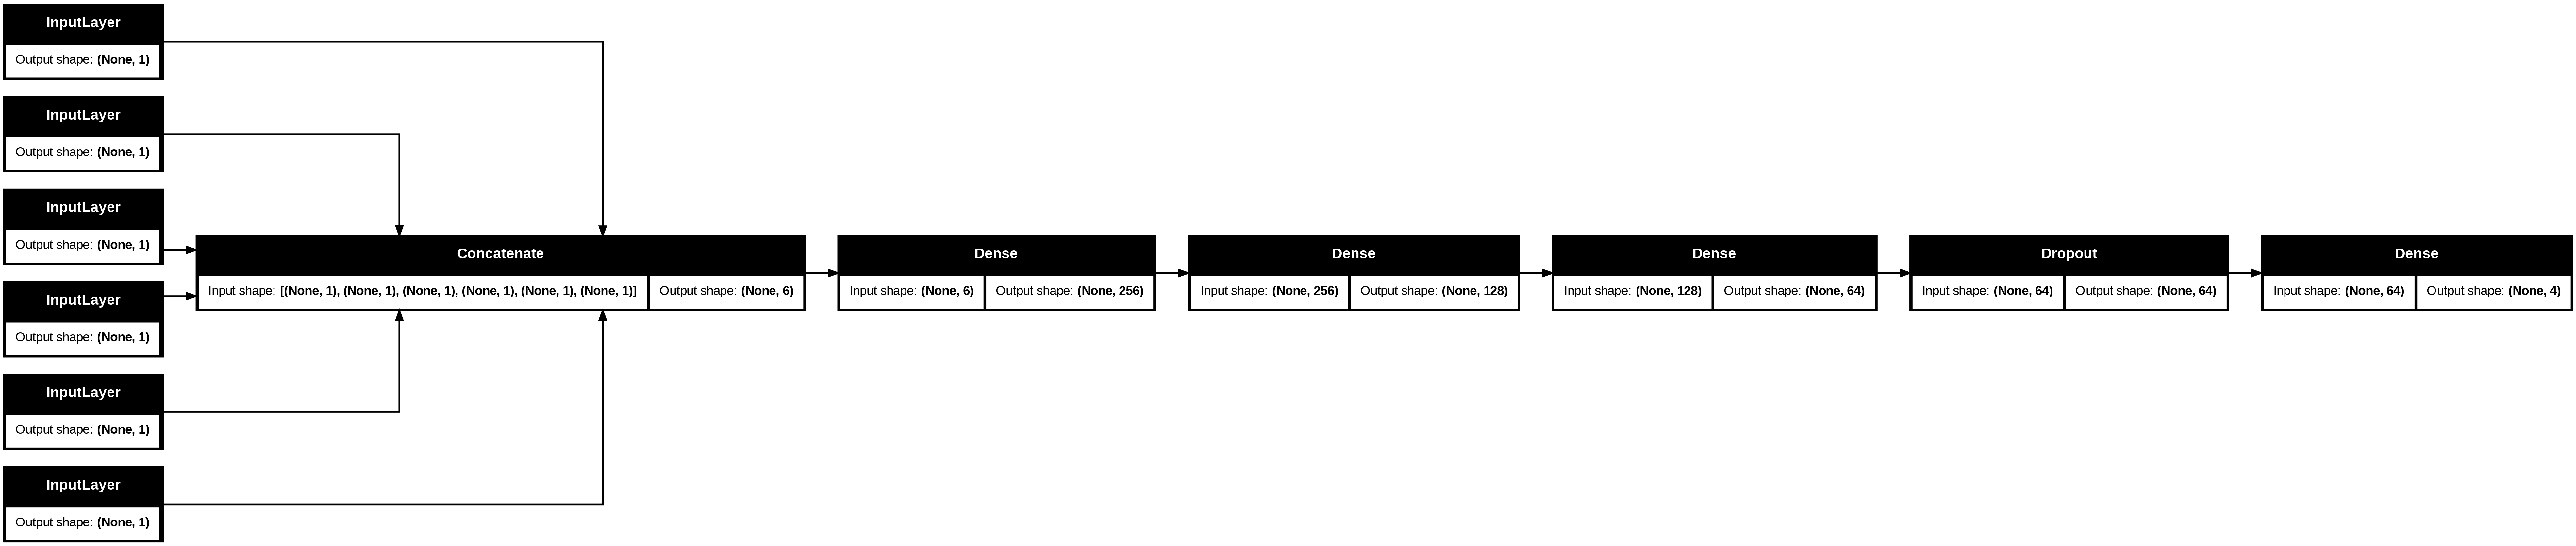

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

# **ML**

In [ ]:
pip install skl2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import skl2onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


labels =dataframe['label']

features = dataframe.drop(['label'], axis='columns')


# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

[1 2 0 ... 2 2 3]
0.37419775916458176


In [ ]:
input_data = {
    "amplitude": np.array([5], dtype=np.float32),
    "duration": np.array([1], dtype=np.float32),
    "energy": np.array([6], dtype=np.float32),
    "rms": np.array([9], dtype=np.float32),
    "rise_time": np.array([3], dtype=np.float32),
    "counts": np.array([7], dtype=np.float32)

}

In [ ]:
p1=pd.DataFrame.from_dict(input_data)

In [ ]:
preds = model.predict(p1)
print(preds)

[1]


In [ ]:
# Define the input with column names
# Define the input as a single tensor
initial_type = [("input", FloatTensorType([p1.shape[1]]))]

# Convert to ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type, target_opset=13)


In [ ]:
# Save the ONNX model
with open("modelML1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
import onnxruntime as rt
import numpy as np

# Create an inference session
session = rt.InferenceSession('/content/modelML1.onnx')

# Convert DataFrame to numpy array
input_data = p1.values.astype(np.float32)
input_data1=input_data[0]
# Prepare the input as a dictionary
onnx_input = {"input": input_data1}

# Run inference
output = session.run(None,onnx_input)

print("Model Output:", output)


Model Output: [array([1], dtype=int64), [{0: 0.0, 1: 1.0, 2: 0.0, 3: 0.0}]]


In [ ]:
import onnx

# Load the ONNX model
model = onnx.load('/content/modelML1.onnx')

# Display the current outputs
print("Before modification, model outputs:")
for output in model.graph.output:
    print(f"Output Name: {output.name}, Type: {output.type}")

# Remove the second output
# Assuming the model has at least two outputs, and you want to keep only the first one
model.graph.output.pop(1)  # Remove the second output

# Save the modified model
onnx.save(model, "modified_model.onnx")

# Verify the outputs after modification
print("\nAfter modification, model outputs:")
for output in model.graph.output:
    print(f"Output Name: {output.name}, Type: {output.type}")


Before modification, model outputs:
Output Name: output_label, Type: tensor_type {
  elem_type: 7
  shape {
    dim {
      dim_value: 6
    }
  }
}

Output Name: output_probability, Type: sequence_type {
  elem_type {
    map_type {
      key_type: 7
      value_type {
        tensor_type {
          elem_type: 1
        }
      }
    }
  }
}


After modification, model outputs:
Output Name: output_label, Type: tensor_type {
  elem_type: 7
  shape {
    dim {
      dim_value: 6
    }
  }
}



In [ ]:
import onnxruntime as rt
import numpy as np

# Create an inference session
session = rt.InferenceSession('/content/modified_model.onnx')

# Convert DataFrame to numpy array
input_data = p1.values.astype(np.float32)
input_data1=input_data[0]
# Prepare the input as a dictionary
onnx_input = {"input": input_data1}

# Run inference
output = session.run(None,onnx_input)

print("Model Output:", output)

Model Output: [array([1], dtype=int64)]


In [ ]:
import onnx
from onnx import helper, TensorProto

# Load the original ONNX model
model = onnx.load("/content/modified_model.onnx")

# Display existing inputs and outputs for reference
print("Original model inputs:")
for inp in model.graph.input:
    print(f"Input Name: {inp.name}, Type: {inp.type}")

# Remove the existing single tensor input
model.graph.input.pop(0)

# Add six new scalar inputs
new_inputs = [
    helper.make_tensor_value_info("amplitude", TensorProto.FLOAT, [1]),
    helper.make_tensor_value_info("duration", TensorProto.FLOAT, [1]),
    helper.make_tensor_value_info("energy", TensorProto.FLOAT, [1]),
    helper.make_tensor_value_info("rms", TensorProto.FLOAT, [1]),
    helper.make_tensor_value_info("rise_time", TensorProto.FLOAT, [1]),
    helper.make_tensor_value_info("counts", TensorProto.FLOAT, [1])
]
model.graph.input.extend(new_inputs)

# Add a Concat node to combine the six inputs
concat_output_name = "concatenated_input"
concat_node = helper.make_node(
    "Concat",
    inputs=['amplitude','duration','energy','rms','rise_time','counts'],
    outputs=[concat_output_name],
    axis=0  # Concatenate along the first axis (creating a 1D tensor)
)
model.graph.node.insert(0, concat_node)  # Insert at the beginning of the graph

# Update the first operation in the graph to take the concatenated tensor as input
# Assume the first node in the graph takes the original input tensor
first_node = model.graph.node[1]
first_node.input[0] = concat_output_name

# Save the modified ONNX model
onnx.save(model, "modified_model3.onnx")

print("\nModified model inputs:")
for inp in model.graph.input:
    print(f"Input Name: {inp.name}, Type: {inp.type}")

print("\nThe model has been updated to accept six separate inputs and concatenate them.")


Original model inputs:
Input Name: input, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 6
    }
  }
}


Modified model inputs:
Input Name: amplitude, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}

Input Name: duration, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}

Input Name: energy, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}

Input Name: rms, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}

Input Name: rise_time, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}

Input Name: counts, Type: tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
  }
}


The model has been updated to accept six separate inputs and concatenate them.


In [ ]:
import onnxruntime as rt
import numpy as np

# Create an inference session
session = rt.InferenceSession('/content/modified_model3.onnx')
'''
# Convert DataFrame to numpy array
input_data = p1.values.astype(np.float32)
input_data1=input_data[0]
# Prepare the input as a dictionary
onnx_input = {"input": input_data1}
'''
# Run inference
output = session.run(None,input_data)

print("Model Output:", output)

Model Output: [array([1], dtype=int64)]
